In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons

In [9]:
# import the neural network class from the other notebook
import import_ipynb
import NeuralNetwork_class

#### The task : Classify dataset using the network that we build in the "NeuralNetwork_class.ipynb" file

In [10]:
x,y = make_moons(n_samples=400, shuffle=False, noise=.15)

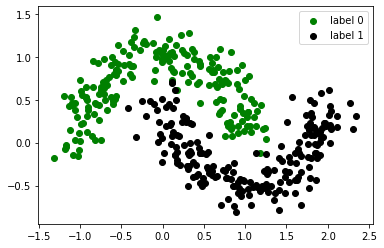

In [11]:
#scatter plot of data
plt.scatter(x[:200,0],x[:200,1], color = 'green')
plt.scatter(x[200:,0],x[200:,1], color = 'black')
plt.legend(('label 0','label 1'))

In [12]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.1)
x_trainval, x_val, y_trainval, y_val=train_test_split(x_train,y_train,test_size=0.1)

In [13]:
train_shape = x_train.shape[0]
val_shape = x_val.shape[0]
test_shape = x_test.shape[0]

In [14]:
# hyperparameters tuning

best_score = 0

first_layer_hidden_neurons = np.arange(4,12,2)
second_layer_hidden_neurons = [4, 2]
learning_rates = [0.05, 0.1, 0.15, 0.3] 
minibatch_sizes = [50, 100, 200]
iterations = [1000, 5000, 10000, 25000] 

for first_hidden_neuron in first_layer_hidden_neurons :
    for second_hidden_neuron in second_layer_hidden_neurons :
        for learning_rate in learning_rates :
            for minibatch_size in minibatch_sizes :
                for iteration in iterations : 

                    # the model
                    nn = NeuralNetwork_class.NeuralNetwork(2,first_hidden_neuron,second_hidden_neuron, 2) # fix 2 neurons for 3rd hidden    
                    # train the model
                    nn.sgd(x_trainval, y_trainval, learning_rate, minibatch_size,iteration) 
                    # accuracy over validation set
                    score = accuracy_score(y_val , np.where(nn.forward_pass(x_val)[0].reshape(val_shape,1) > 1/2, 1, 0)  )

                    if score > best_score :
                        best_score = score
                        opt_param = {'first layer hidden_neurons' : first_hidden_neuron,
                                     'second layer hidden neurons' : second_hidden_neuron,
                                    'learning_rate' : learning_rate,
                                    'minibatch_size' : minibatch_size,
                                    'iterations' : iteration}


In [16]:
# final model
print('The optimal parameters are ', opt_param)
model = NeuralNetwork_class.NeuralNetwork(2, opt_param['first layer hidden_neurons'],opt_param['second layer hidden neurons'], 2)
# training
model.sgd(x_train,y_train,opt_param['learning_rate'],opt_param['minibatch_size'],opt_param['iterations'])

The optimal parameters are  {'first layer hidden_neurons': 4, 'second layer hidden neurons': 4, 'learning_rate': 0.1, 'minibatch_size': 50, 'iterations': 1000}


In [17]:
model_train_score = accuracy_score(y_train , np.where(model.forward_pass(x_train)[0].reshape(train_shape,1) > 1/2 ,1,0)  )
print('Over the training set, the model scores : ',model_train_score)
model_test_score = accuracy_score(y_test , np.where(model.forward_pass(x_test)[0].reshape(test_shape,1) > 1/2 ,1,0)  )
print('Over the unseen data of the test set, the model scores : ',model_test_score)

Over the training set, the model scores :  0.9777777777777777
Over the unseen data of the test set, the model scores :  1.0


### plotting the classifier

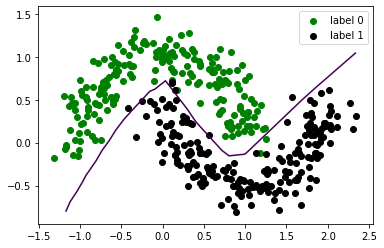

In [18]:
plt.figure()
    
#scatter plot of data
plt.scatter(x[:200,0],x[:200,1], color = 'green')
plt.scatter(x[200:,0],x[200:,1], color = 'black')
plt.legend(('label 0','label 1'))

#contour line of learned classifier
x_min = x[:,0].min()
y_min = x[:,1].min()
x_max = x[:,0].max()
y_max = x[:,1].max()

u = np.linspace(x_min,x_max, 20)
v = np.linspace(y_min,y_max, 20)
xx, yy = np.meshgrid(u,v) 
xx_line = np.resize(xx,(20**2,1))
yy_line = np.resize(yy,(20**2,1))         
t = np.concatenate((xx_line,yy_line), axis = 1)
z_pre=model.forward_pass(t)[0]
z_post = np.resize(z_pre,(20,20))  
plt.contour(xx,yy,z_post, levels = [1/2])